Dice Game

Q Value: 12.0


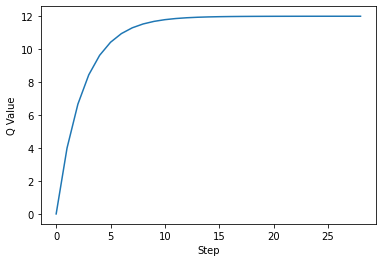

In [ ]:
WIN_PROB = 2 / 3
STAY_GAIN = 4
QUIT_GAIN = 10
GAMA = 1.0
EPS = 0.0001

import matplotlib.pyplot as plt
import numpy as np

def dice_game(gama, eps, only_res = False):
    X = [0]
    Y = [0.0]

    Vt_in = 0.0
    Vt_end = 0.0
    eps = 100
    step = 0
    while eps > EPS:
        step += 1
        Vt_in_old = Vt_in
        Vt_in = WIN_PROB * (STAY_GAIN + Vt_in * gama) + (1 - WIN_PROB) * (STAY_GAIN + Vt_end * gama)
        eps = Vt_in - Vt_in_old
        if not only_res:
            X.append(step)
            Y.append(Vt_in)

    res = round(Vt_in, 3)
    if only_res:
        return res
    return X, Y, res

X, Y, res = dice_game(GAMA, EPS)
print('Q Value:', res)
plt.plot(X, Y)
plt.xlabel('Step')
plt.ylabel('Q Value')
plt.show()

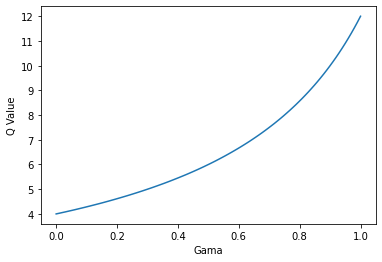

In [ ]:
X = []
Y = []
for gama in np.linspace(0, 1, 100):
    res = dice_game(gama, EPS, True)
    X.append(gama)
    Y.append(res)

plt.plot(X, Y)
plt.xlabel('Gama')
plt.ylabel('Q Value')
plt.show()

Car Problem

Q Value: 4.0


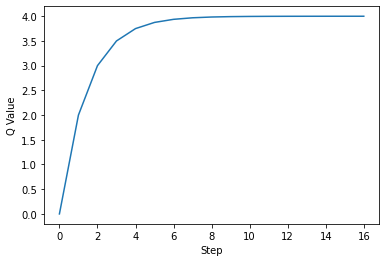

In [ ]:
COOL_FAST_WARM_PROB = 0.5
WARM_SLOW_COOL_PROB = 0.5
WARM_FAST_OVER_PROB = 1.0
FAST_GAIN = 2
SLOW_GAIN = 1
OVER_GAIN = -10
GAMA = 1.0
EPS = 0.0001

# States
COOL = 1
WARM = 2

# Actions
SLOW = 1
FAST = 2

import matplotlib.pyplot as plt
import numpy as np

def car_problem(gama, eps, state, action, only_res = False):
    X = [0]
    Y = [0.0]

    eps = 10
    Vt_in = 0
    Vt_end = 0
    step = 0

    if state == COOL and action == FAST:
        in_prob = COOL_FAST_WARM_PROB
        gain = FAST_GAIN
    elif state == COOL and action == SLOW:
        in_prob = 1.0
        gain = SLOW_GAIN
    elif state == WARM and action == SLOW:
        in_prob = WARM_SLOW_COOL_PROB
        gain = SLOW_GAIN
    else:
        in_prob = 1.0
        gain = OVER_GAIN

    while eps > EPS:
        step += 1
        Vt_in_old = Vt_in
        Vt_in = in_prob * (gain + Vt_in * gama) + (1 - in_prob) * (gain + Vt_end * gama)
        eps = Vt_in - Vt_in_old
        if not only_res:
            X.append(step)
            Y.append(Vt_in)

    res = round(Vt_in, 3)

    if only_res:
        return res
    return X, Y, res

X, Y, res = car_problem(GAMA, EPS, state=COOL, action=FAST)

print('Q Value:', res)
plt.plot(X, Y)
plt.xlabel('Step')
plt.ylabel('Q Value')
plt.show()

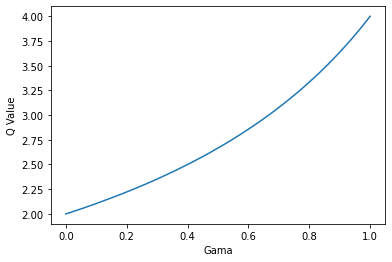

In [ ]:
X = []
Y = []
for gama in np.linspace(0, 1, 100):
    res = car_problem(gama, EPS, COOL, FAST, True)
    X.append(gama)
    Y.append(res)

plt.plot(X, Y)
plt.xlabel('Gama')
plt.ylabel('Q Value')
plt.show()

2.75


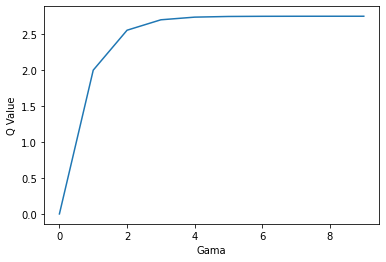

In [ ]:
GAMA = 1 / 3
EPS = 0.0001

def car_problem_opt(gama, eps, only_res = False):
    X = [0]
    Y = [0.0]

    eps = 10
    Vt_in = 0
    Vt_end = 0
    step = 0

    Vt_cool_fast = 0
    Vt_warm_slow = 0

    while eps > EPS:
        step += 1
        Vt_cool_fast_old = Vt_cool_fast
        Vt_cool_fast = COOL_FAST_WARM_PROB * (FAST_GAIN + Vt_warm_slow * gama) + (1 - COOL_FAST_WARM_PROB) * (FAST_GAIN + Vt_cool_fast * gama)
        Vt_warm_slow = WARM_SLOW_COOL_PROB * (SLOW_GAIN + Vt_cool_fast * gama) + (1 - WARM_SLOW_COOL_PROB) * (SLOW_GAIN + Vt_warm_slow * gama)
        eps = Vt_cool_fast - Vt_cool_fast_old
        if not only_res:
            X.append(step)
            Y.append(Vt_cool_fast)
        if step > 10000:
            break

    res = round(Vt_cool_fast, 3)
    if only_res:
        return res
    return X, Y, res

X, Y, res = car_problem_opt(GAMA, EPS)
print(res)
plt.plot(X, Y)
plt.xlabel('Gama')
plt.ylabel('Q Value')
plt.show()

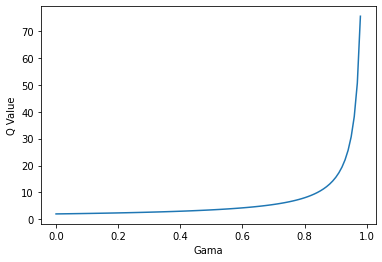

In [ ]:
X = []
Y = []
for gama in np.linspace(0, 0.98, 100):
    res = car_problem_opt(gama, EPS, True)
    X.append(gama)
    Y.append(res)

plt.plot(X, Y)
plt.xlabel('Gama')
plt.ylabel('Q Value')
plt.show()